# Potato-Leaf-Disease-Predictin-CNN-tf

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import warnings
import matplotlib.pyplot as plt
import cv2
import random
import pickle
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
def Image_Dir_Func(data_dir):
    try:
        image_dir = []
        for i in os.listdir(data_dir):
            train_test_val_dirs = os.path.join(data_dir,i)
            for j in os.listdir(train_test_val_dirs):
                image_path = os.path.join(train_test_val_dirs,j)
                for k in os.listdir(image_path):
                    image_path_name = os.path.join(image_path, k)
                    image_dir.append(image_path_name)

        return image_dir
    except Exception as e:
        print('Error Generated image directory')
        raise e

In [3]:
data_dir = r'D:\my_projects\Potato-Disease-Prediction-CNN\data\Potato'

In [4]:
Image_dirs = Image_Dir_Func(data_dir)

In [5]:
Image_dirs[:10]

['D:\\my_projects\\Potato-Disease-Prediction-CNN\\data\\Potato\\Test\\Potato___Early_blight\\034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG',
 'D:\\my_projects\\Potato-Disease-Prediction-CNN\\data\\Potato\\Test\\Potato___Early_blight\\042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG',
 'D:\\my_projects\\Potato-Disease-Prediction-CNN\\data\\Potato\\Test\\Potato___Early_blight\\0604174e-3018-4faa-9975-0be32d2c0789___RS_Early.B 7123.JPG',
 'D:\\my_projects\\Potato-Disease-Prediction-CNN\\data\\Potato\\Test\\Potato___Early_blight\\07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG',
 'D:\\my_projects\\Potato-Disease-Prediction-CNN\\data\\Potato\\Test\\Potato___Early_blight\\08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG',
 'D:\\my_projects\\Potato-Disease-Prediction-CNN\\data\\Potato\\Test\\Potato___Early_blight\\08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG',
 'D:\\my_projects\\Potato-Disease-Prediction-CNN\\data\\Potato\\Test\\Potato

In [6]:
random.shuffle(Image_dirs)

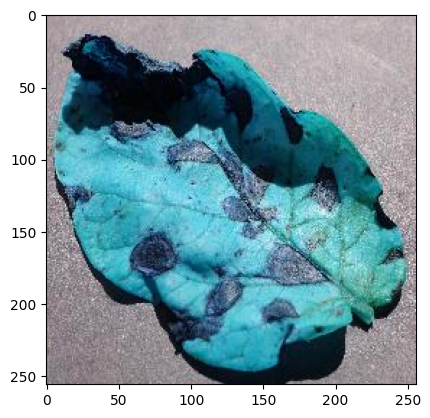

In [7]:
data_image = cv2.imread(Image_dirs[0])
plt.imshow(data_image)
plt.show()

In [8]:
def Image_Dir_Func2(data_dir):
        data_image_dir = []
        image_size = 256
        categories = ['Potato___Early_blight', 'Potato___healthy','Potato___Late_blight']
        try:
            for i in os.listdir(data_dir):
                train_test_val_dirs = os.path.join(data_dir,i)
                for j in os.listdir(train_test_val_dirs):
                    cat_index = categories.index(j)
                    image_path = os.path.join(train_test_val_dirs,j)
                    for k in os.listdir(image_path):
                        image_path_name = os.path.join(image_path, k)
                        data_image = cv2.imread(image_path_name)
                        data_image = cv2.resize(data_image, (image_size, image_size))
                        data_image_dir.append([data_image,cat_index])
            return data_image_dir
        except Exception as e:
            print('Error Generated image directory')
            raise e
    

In [9]:
data_dir = r'D:\my_projects\Potato-Disease-Prediction-CNN\data\Potato'
Data = Image_Dir_Func2(data_dir)

In [10]:
print(len(Data))

1500


In [11]:
print(Data[0])

[array([[[197, 183, 184],
        [204, 190, 191],
        [208, 194, 195],
        ...,
        [177, 159, 160],
        [156, 138, 139],
        [149, 131, 132]],

       [[206, 192, 193],
        [218, 204, 205],
        [223, 209, 210],
        ...,
        [175, 157, 158],
        [160, 142, 143],
        [163, 145, 146]],

       [[194, 180, 181],
        [201, 187, 188],
        [204, 190, 191],
        ...,
        [172, 154, 155],
        [160, 142, 143],
        [166, 148, 149]],

       ...,

       [[174, 160, 162],
        [175, 161, 163],
        [174, 160, 162],
        ...,
        [121, 107, 111],
        [147, 133, 137],
        [138, 124, 128]],

       [[175, 161, 163],
        [177, 163, 165],
        [177, 163, 165],
        ...,
        [155, 141, 145],
        [145, 131, 135],
        [146, 132, 136]],

       [[184, 170, 172],
        [184, 170, 172],
        [185, 171, 173],
        ...,
        [160, 146, 150],
        [133, 119, 123],
        [167, 153, 157]

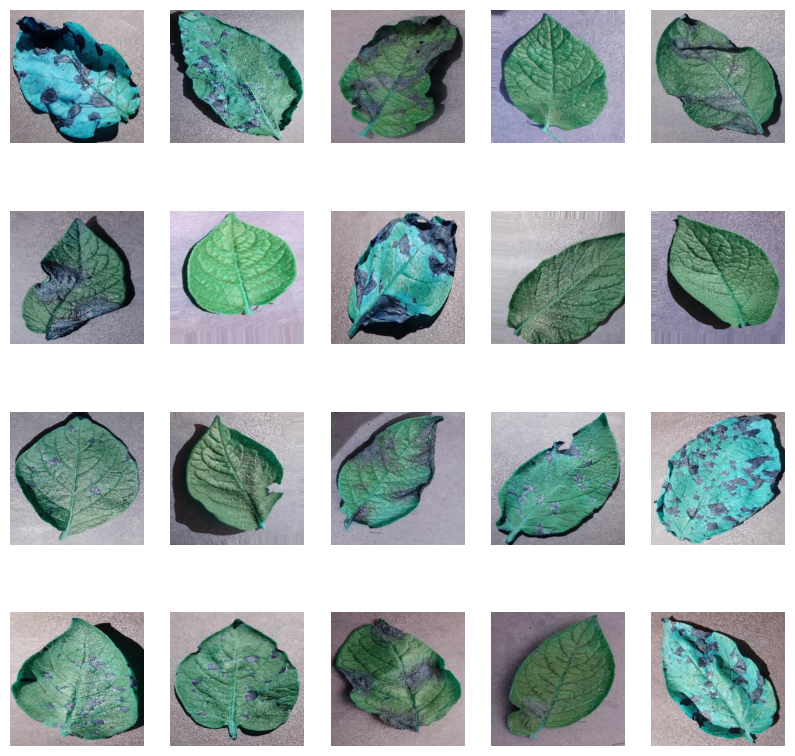

In [12]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    data_image = cv2.imread(Image_dirs[i])
    plt.imshow(data_image)
    plt.axis('off')

In [13]:
random.shuffle(Data)

In [14]:
traning_data, testing_data = train_test_split(Data)

In [15]:
X = []
y = []

IMG_SIZE = 256

for features, label in traning_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

X = X / 255.0

y = np.array(y)

In [16]:
X2 = []
y2 = []

IMG_SIZE = 256

for features1, label1 in testing_data:
    X2.append(features1)
    y2.append(label1)

X2 = np.array(X2).reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

X2 = X2 / 255.0

y2 = np.array(y2)

In [17]:
print(len(X), len(X2), len(y), len(y2))

1125 375 1125 375


In [18]:
#save the Data
def Data_Save_func(data_file1, data_file2):
    pickle_data_in = open(data_file1, 'wb')
    pickle.dump(X2, pickle_data_in)
    pickle_data_in.close()

    pickle_data_out = open(data_file2, 'wb')
    pickle.dump(y2, pickle_data_out)
    pickle_data_out.close()


In [19]:
data_file1 = r'D:\my_projects\Potato-Disease-Prediction-CNN\data_main\X2.pickle'
data_file2 = r'D:\my_projects\Potato-Disease-Prediction-CNN\data_main\y2.pickle'
Data_Save_func(data_file1, data_file2)

In [20]:
with open(data_file1, 'rb') as f:
    X2_ = pickle.load(f)
    print(len(X2_))

with open(data_file2, 'rb') as f:
    y2_ = pickle.load(f)
    print(len(y2_))

375
375


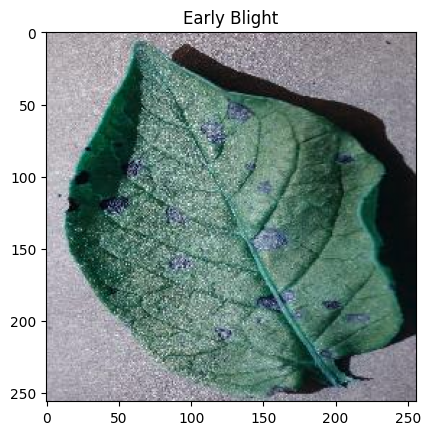

In [21]:
plt.imshow(X[100])
if y[100] == 0:
    plt.title('Early Blight')
elif y[100] == 1:
    plt.title('Healthy')
else:
    plt.title('Late Blight')
plt.show()

In [22]:
IMAGE_SIZE = 256
CHANNELS = 3

In [23]:
n_classes = 3
model = models.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.RandomContrast(0.2),
        layers.experimental.preprocessing.RandomTranslation(0.2, 0.2),
        layers.Conv2D(
            32, kernel_size=(3, 3), activation="relu", input_shape=X.shape[1:]
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(n_classes),
    ]
)

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    X,
    y,
    batch_size=32,
    epochs=10,
    validation_split=0.3,
)

Epoch 1/10
25/25 [==============================] - 51s 2s/step - loss: 1.1000 - accuracy: 0.3405 - val_loss: 1.0904 - val_accuracy: 0.3462
Epoch 2/10
25/25 [==============================] - 51s 2s/step - loss: 1.0217 - accuracy: 0.4892 - val_loss: 0.7017 - val_accuracy: 0.6657
Epoch 3/10
25/25 [==============================] - 54s 2s/step - loss: 0.6981 - accuracy: 0.6391 - val_loss: 0.6669 - val_accuracy: 0.6479
Epoch 4/10
25/25 [==============================] - 51s 2s/step - loss: 0.6776 - accuracy: 0.6760 - val_loss: 0.5627 - val_accuracy: 0.7337
Epoch 5/10
25/25 [==============================] - 51s 2s/step - loss: 0.6136 - accuracy: 0.7230 - val_loss: 0.6599 - val_accuracy: 0.7278
Epoch 6/10
25/25 [==============================] - 59s 2s/step - loss: 0.8611 - accuracy: 0.5438 - val_loss: 0.8535 - val_accuracy: 0.6095
Epoch 7/10
25/25 [==============================] - 52s 2s/step - loss: 0.5942 - accuracy: 0.7243 - val_loss: 0.5566 - val_accuracy: 0.7722
Epoch 8/10
25/25 [==

In [26]:
pred1 = model.predict(X2)

12/12 [==============================] - 5s 430ms/step


In [27]:
#predicted lable & Actual lable
pred2 = np.argmax(pred1[1])
print(f'Predicted_label: {pred2}')
print(f'Actual_label: {y2[1]}')

Predicted_label: 1
Actual_label: 1


In [35]:
model.evaluate(X, y)

36/36 [==============================] - 15s 416ms/step - loss: 0.2682 - accuracy: 0.8711


[0.2681914269924164, 0.8711110949516296]

In [36]:
def Predictions():
    print("Image Predict Manually")
    choice = random.choice(X)
    single_input = np.expand_dims(choice, axis=0)
    prediction = np.argmax(model.predict(single_input))
    prediction1 = model.predict(single_input)
    confidance = round(100 * (np.max(prediction1)), 2)
    if prediction == 0:
        plt.imshow(choice)
        plt.title('Potato___Early_blight, Confidance :{}'.format(confidance))
    elif prediction == 1:
        plt.imshow(choice)
        plt.title('Potato___Healthy, Confidance :{}'.format(confidance))
    else:
        plt.imshow(choice)
        plt.title('Potato___Late_blight, Confidance :{}'.format(confidance))


Image Predict Manually
1/1 [==============================] - 0s 35ms/step


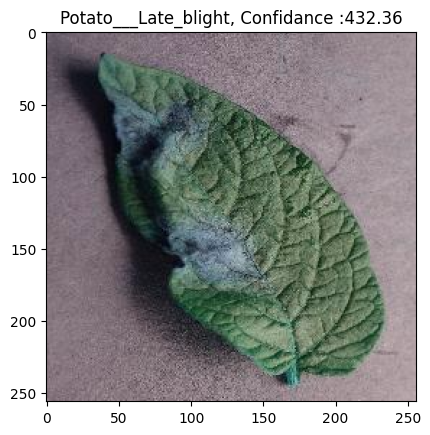

In [59]:
Predictions()

1/1 [==============================] - 0s 34ms/step


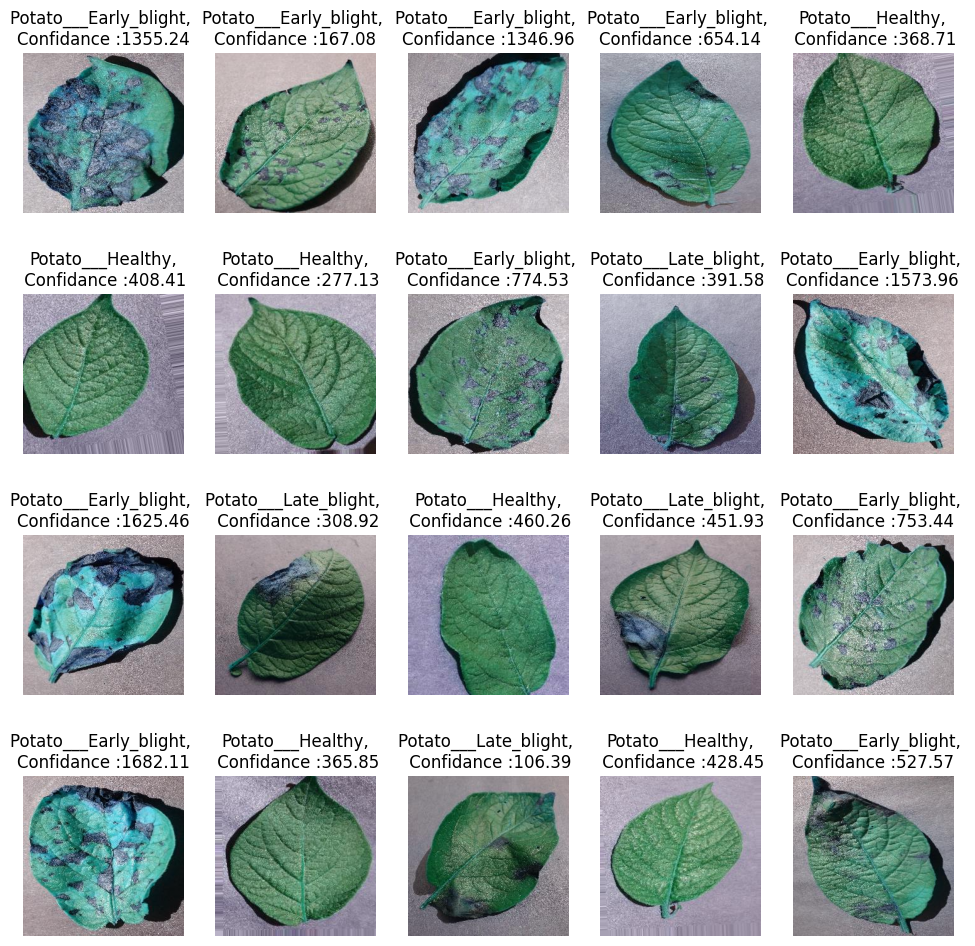

In [62]:
plt.figure(figsize=(12,12))
for i in range(20):
    try:
        choice = random.choice(X)
        single_input = np.expand_dims(choice, axis=0)
        prediction = np.argmax(model.predict(single_input))
        prediction1 = model.predict(single_input)
        confidance = round(100 * (np.max(prediction1)), 2)
        if prediction == 0:
            plt.subplot(4,5,i+1)
            plt.imshow(choice)
            plt.imshow(choice)
            plt.title('Potato___Early_blight, \nConfidance :{}'.format(confidance))
            plt.axis('off')

        if prediction == 1:
            plt.subplot(4,5,i+1)
            plt.imshow(choice)
            plt.title('Potato___Healthy,\n Confidance :{}'.format(confidance))
            plt.axis('off')

        if prediction == 2:
            plt.subplot(4,5,i+1)
            plt.imshow(choice)
            plt.title('Potato___Late_blight, \n Confidance :{}'.format(confidance))
            plt.axis('off')
    except Exception as e:
        raise e


In [5]:
model_path = '..\Model\potato-model'
new_model = tf.keras.models.load_model(model_path)

In [6]:
categories = ['Potato___Early_blight', 'Potato___healthy','Potato___Late_blight']

1/1 [==============================] - 0s 45ms/step


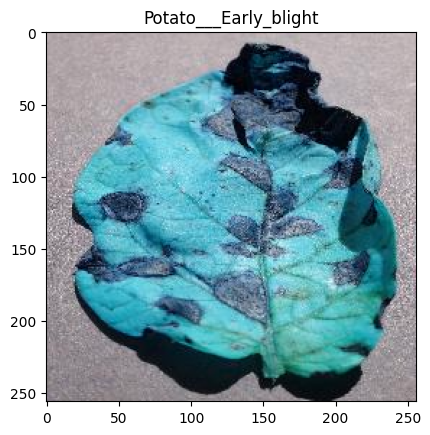

In [8]:
"""Single Image Prediction form Raw data
"""

#Single Image Path
single_image = r"D:\my_projects\Potato-Disease-Prediction-CNN\data\Potato\Train\Potato___Early_blight\b7157976-61c2-4366-87c5-e3de23aa7c10___RS_Early.B 7227.JPG"
cv_image = cv2.imread(single_image)
cv_image = cv2.resize(cv_image,(256, 256))
cv_array = np.array(cv_image).reshape(-1, 256, 256, 3)
cv_array = cv_array / 255.0
pred12 = new_model.predict(cv_array)
plt.imshow(cv_image)
plt.title(categories[np.argmax(pred12)])
plt.show()